# Credit Card Selection

### Introduction

Different types of credit cards are offerd by banks. The banks try to sell expensive cards to profit from high fees. In this bank, there are 4 types of cards offered by the bank. They are Blue, Silver, Gold and Platinium cards.

In this project, I am going to use one of the supervised classification machine learning model - Decision Tree to predict which customers are going to use different card types based on their income, age, sex, marital status, dependents, education and so on.

In [1]:
#Let's first import important libraries

# Importing Essential libraries:

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pltm

from pandas import Series, DataFrame
from matplotlib import rcParams
from matplotlib import pyplot

## 2. Data

### 2.1 Data downloading

In [2]:
#Loading data

df = pd.read_csv('/Users/ruhidmirzayev/Desktop/ ML_Projects/Data/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Variable description

1. CLIENTNUM: Client number. Unique identifier for the customer holding the account
2. Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
3. Customer_Age: Demographic variable - Customer's Age in Years
4. Gender:Demographic variable - M=Male, F=Female
5. Dependent_count: Demographic variable - Number of dependents
6. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school,college graduate, etc.)
7. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
8. Income_Category:Demographic variable - Annual Income Category of the account  holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
9. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
10. Months_on_book: Period of relationship with bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts in the last 12 months
14. Credit_Limit:Credit Limit on the Credit Card
15. Total_Revolving_Bal: Total Revolving Balance on the Credit Card
16. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
17. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
18. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
19. Total_Trans_Ct:Total Transaction Count (Last 12 months)
20. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
21. Avg_Utilization_Ratio: Average Card Utilization Ratio

In [3]:
#Let's drop some insignificant variables such as client number
df.drop(['CLIENTNUM','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
        axis = 1, inplace = True)

#Let's change variable names for sake of simlicity

df.columns = ['status','age', 'sex', 'dependents', 'education', 'marital_status', 'income', 'cardtype', 
              'months_on_book', 'relatioship_count', 'inactive_mon', 'contacts', 'credit_limit', 
              'revolving_bal', 'open_to_buy','trans_amount', 'trans_count', 'use_ratio']
df.head(10)

,status,age,sex,dependents,education,marital_status,income,cardtype,months_on_book,relatioship_count,inactive_mon,contacts,credit_limit,revolving_bal,open_to_buy,trans_amount,trans_count,use_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1330,31,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,1538,36,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,1350,24,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1441,32,0.144


In [4]:
# The results will show no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             10127 non-null  object 
 1   age                10127 non-null  int64  
 2   sex                10127 non-null  object 
 3   dependents         10127 non-null  int64  
 4   education          10127 non-null  object 
 5   marital_status     10127 non-null  object 
 6   income             10127 non-null  object 
 7   cardtype           10127 non-null  object 
 8   months_on_book     10127 non-null  int64  
 9   relatioship_count  10127 non-null  int64  
 10  inactive_mon       10127 non-null  int64  
 11  contacts           10127 non-null  int64  
 12  credit_limit       10127 non-null  float64
 13  revolving_bal      10127 non-null  int64  
 14  open_to_buy        10127 non-null  float64
 15  trans_amount       10127 non-null  int64  
 16  trans_count        101

In [5]:
# Let's count values in object type features.
print (df['marital_status'].value_counts(), '\n', '\n',
       df['education'].value_counts(), '\n','\n',
       df['status'].value_counts(), '\n','\n',
       df['income'].value_counts(), '\n','\n',
       df['cardtype'].value_counts()
      )

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64 
 
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education, dtype: int64 
 
 Existing Customer    8500
Attrited Customer    1627
Name: status, dtype: int64 
 
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income, dtype: int64 
 
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: cardtype, dtype: int64


In reality, the values named 'unknown' are null values. We need to deal with null observations.
Generaly speaking, first we can drop null values, second we can fill them with average of the feature.

In our case, for example it is hard to find average for education, marital status. Dropping null values seem optimal solution here.

In [6]:
# Let's replace unknown observations with the nulls

df.drop(df[df['education'] == 'Unknown'].index , inplace=True)
df.drop(df[df['marital_status'] == 'Unknown'].index , inplace=True)
df.drop(df[df['income'] == 'Unknown'].index , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             7081 non-null   object 
 1   age                7081 non-null   int64  
 2   sex                7081 non-null   object 
 3   dependents         7081 non-null   int64  
 4   education          7081 non-null   object 
 5   marital_status     7081 non-null   object 
 6   income             7081 non-null   object 
 7   cardtype           7081 non-null   object 
 8   months_on_book     7081 non-null   int64  
 9   relatioship_count  7081 non-null   int64  
 10  inactive_mon       7081 non-null   int64  
 11  contacts           7081 non-null   int64  
 12  credit_limit       7081 non-null   float64
 13  revolving_bal      7081 non-null   int64  
 14  open_to_buy        7081 non-null   float64
 15  trans_amount       7081 non-null   int64  
 16  trans_count        7081

## 3. Data Visualisation

Blue        6598
Silver       391
Gold          81
Platinum      11
Name: cardtype, dtype: int64


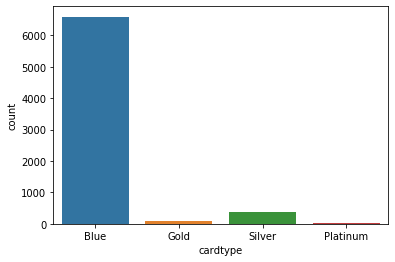

In [7]:
ax = sb.countplot(x='cardtype', data=df)
print(df['cardtype'].value_counts())

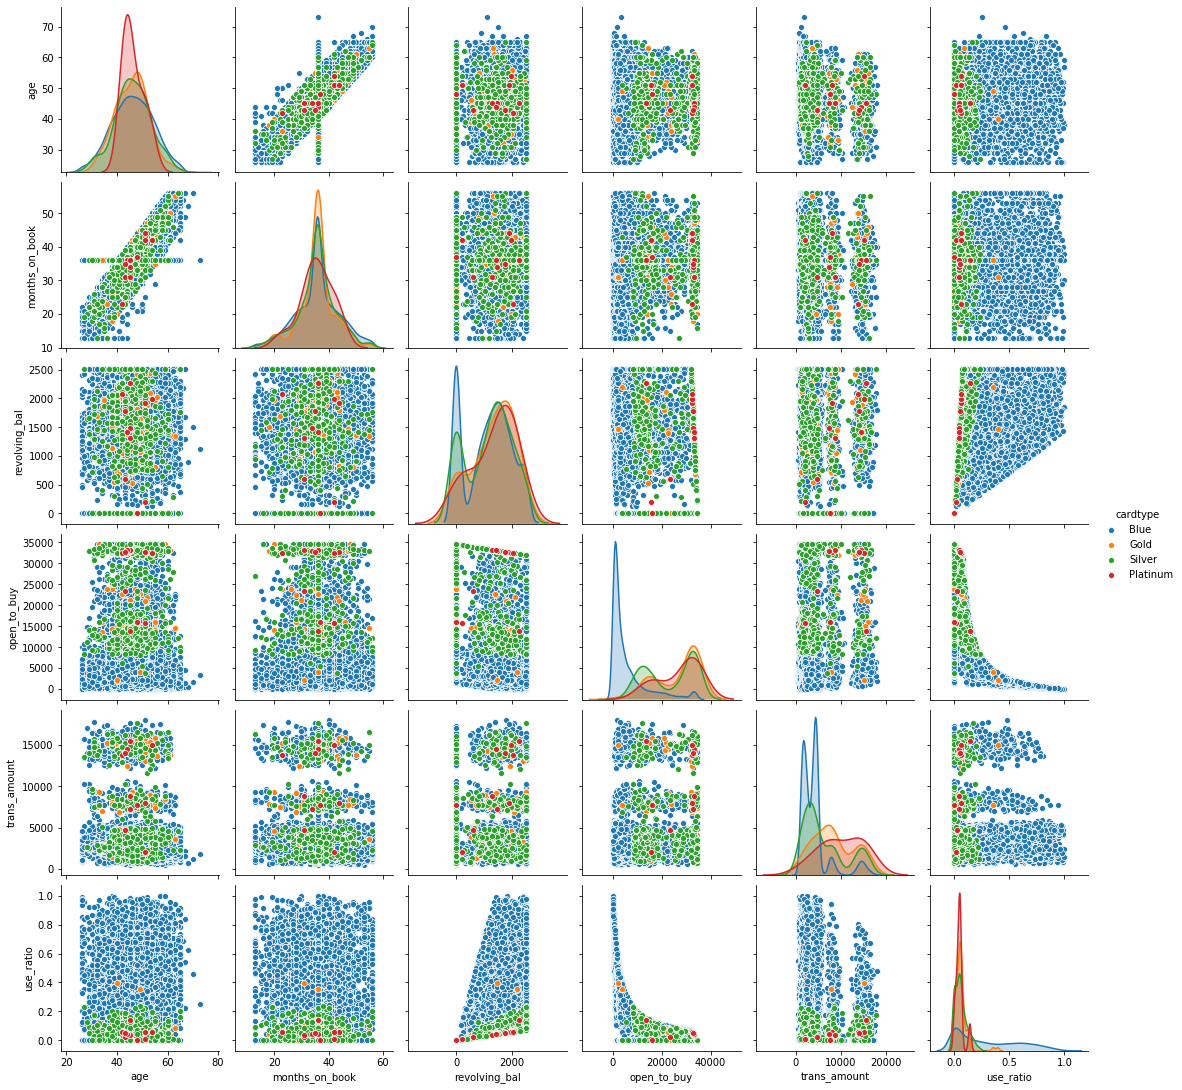

In [8]:
# Paired density and scarplot matrix.

df1 = df[['age', 'months_on_book', 'cardtype', 'revolving_bal', 
          'open_to_buy', 'trans_amount', 'use_ratio']]
sb.pairplot(df1, hue="cardtype")

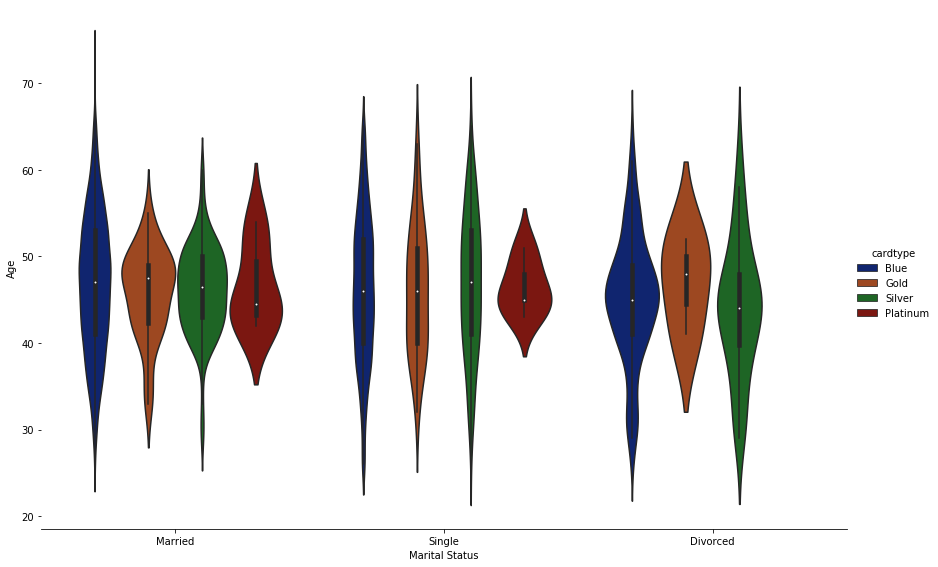

In [9]:
g = sb.catplot(
    data=df, kind="violin",
    x="marital_status", y="age", hue="cardtype",
    ci="sd", palette="dark", alpha=.6, height=8, aspect = 15/10)
g.despine(left=True)
g.set_axis_labels("Marital Status", "Age")

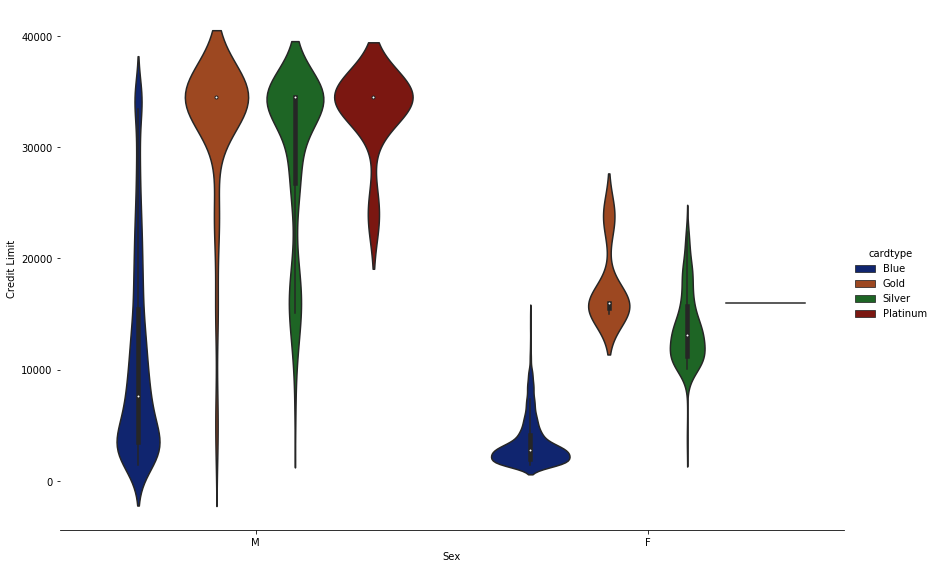

In [10]:
g1 = sb.catplot(
    data=df, kind="violin",
    x="sex", y="credit_limit", hue="cardtype",
    ci="sd", palette="dark", alpha=.6, height=8, aspect = 15/10)
g1.despine(left=True)
g1.set_axis_labels("Sex", "Credit Limit")

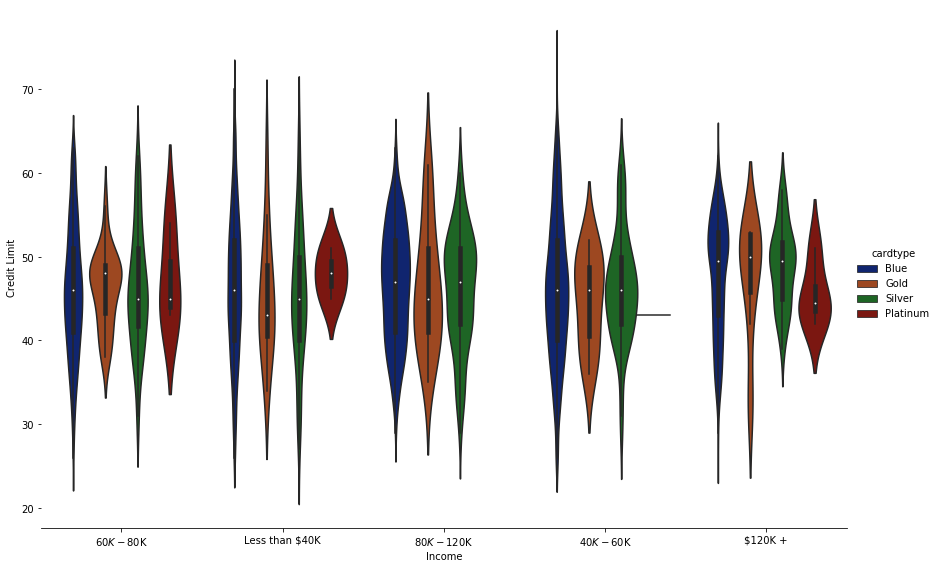

In [11]:
g2 = sb.catplot(
    data=df, kind="violin",
    x="income", y="age", hue="cardtype",
    ci="sd", palette='dark', alpha=.6, height=8, aspect=15/10)
g2.despine(left=True)
g2.set_axis_labels("Income", "Credit Limit")

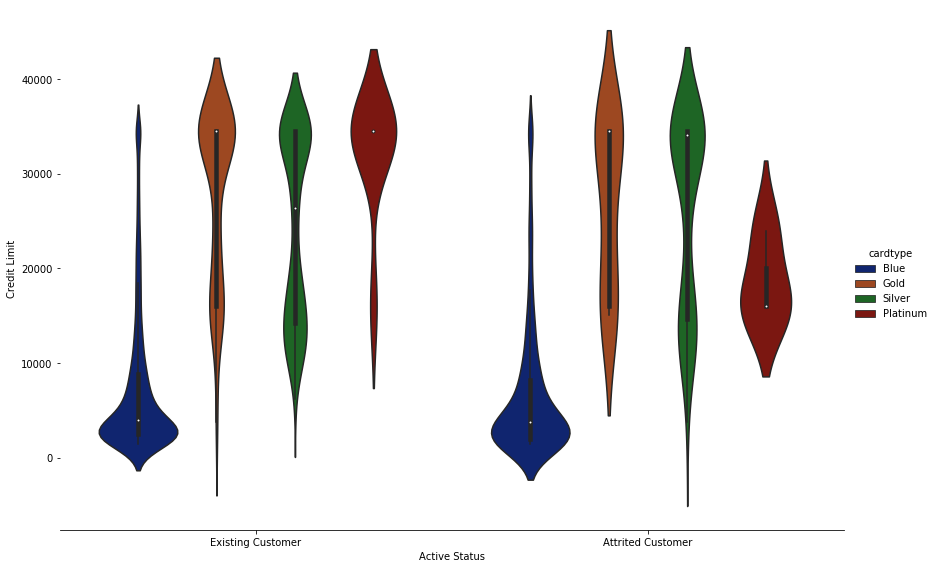

In [12]:
g3 = sb.catplot(
    data=df, kind="violin",
    x= 'status', y="credit_limit", hue="cardtype",
    ci="sd", palette='dark', alpha=.6, height=8, aspect=15/10)
g3.despine(left=True)
g3.set_axis_labels("Active Status", "Credit Limit")

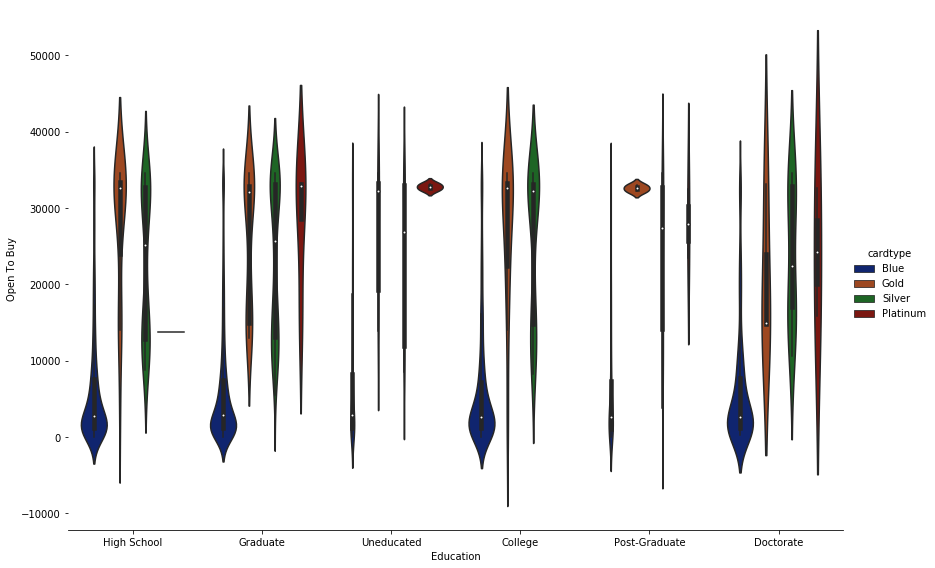

In [13]:
g3 = sb.catplot(
    data=df, kind="violin",
    x= 'education', y="open_to_buy", hue="cardtype",
    ci="sd", palette='dark', alpha=.6, height=8, aspect=15/10)
g3.despine(left=True)
g3.set_axis_labels("Education", "Open To Buy")

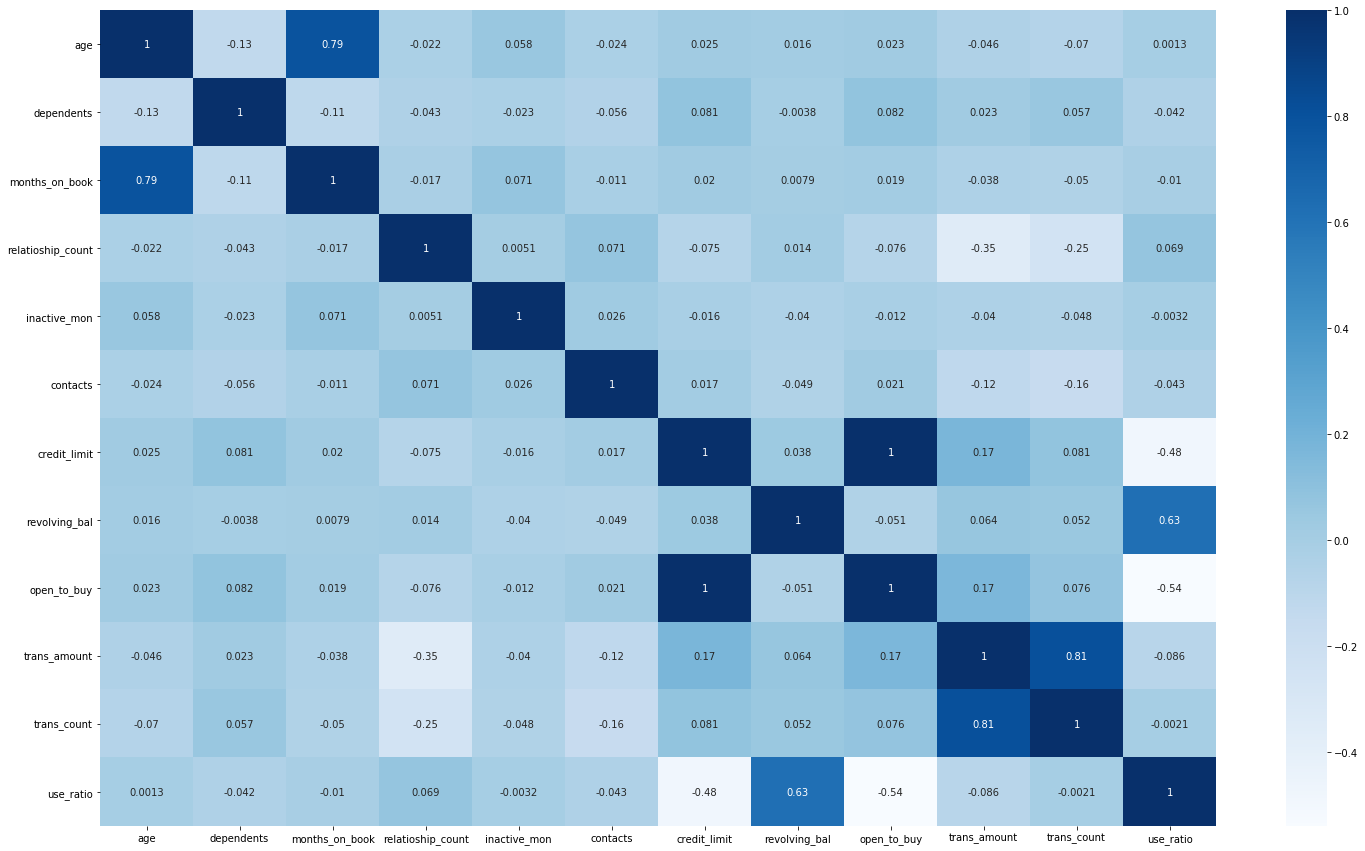

In [14]:
corr = df.corr()
pltm.figure(figsize=(25,15))
sb.heatmap(corr, cmap='Blues', annot = True)
pltm.show()

## Preprocessing

### Data Encoding

In [15]:
#Let's define  X as features and y as target variable.

df.replace(to_replace = {
    'status': {'Existing Customer':1, 'Attrited Customer':0},
    'sex':{'M':1, 'F':0},
    'education': {'Uneducated':0, 'High School':1, 'College':2, 'Post-Graduate':3, 'Graduate':4, 'Doctorate':5},
    'marital_status': {'Married':1, 'Single':0, 'Divorced':2},
    'income': {'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5},
    'cardtype':{'Blue': 1, 'Silver':2, 'Gold':3, 'Platinum':4}
    }, inplace = True)
    
df.head()

,status,age,sex,dependents,education,marital_status,income,cardtype,months_on_book,relatioship_count,inactive_mon,contacts,credit_limit,revolving_bal,open_to_buy,trans_amount,trans_count,use_ratio
0,1,45,1,3,1,1,3,1,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,1,49,0,5,4,0,1,1,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,1,51,1,3,4,1,4,1,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
4,1,40,1,3,0,1,3,1,21,5,1,0,4716.0,0,4716.0,816,28,0.000
5,1,44,1,2,4,1,2,1,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311


In [16]:
X = np.asarray(df[['status','age', 'sex', 'dependents', 'education', 'marital_status', 'income', 
              'months_on_book', 'relatioship_count', 'inactive_mon', 'contacts', 'credit_limit', 
              'revolving_bal', 'open_to_buy','trans_amount', 'trans_count', 'use_ratio']])
X[:1]

array([[1.0000e+00, 4.5000e+01, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 3.9000e+01, 5.0000e+00, 1.0000e+00,
        3.0000e+00, 1.2691e+04, 7.7700e+02, 1.1914e+04, 1.1440e+03,
        4.2000e+01, 6.1000e-02]])

In [17]:
# Transforming target variable to NumPy
y = np.asarray(df['cardtype'])
y [0:5]

array([1, 1, 1, 1, 1])

### Training Data

In [18]:
# Importing Train Test Split

from sklearn.model_selection import train_test_split

#Train/Test data set

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (5664, 17) (5664,)
Test set: (1417, 17) (1417,)


In [19]:
# Standardasing data

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.43185025, -0.16760956,  0.95429837,  0.51270999, -0.8258197 ,
         0.54230562,  0.4843509 ,  0.37723382,  0.764487  , -1.34930866,
         0.4937772 ,  0.460058  , -0.48076043,  0.50256735, -0.93716746,
        -0.94521382, -0.7940566 ],
       [ 0.43185025,  0.32986222, -1.0478903 ,  2.06122755,  0.98142125,
        -1.07184574, -0.99078404,  1.00207422,  1.41201481, -1.34930866,
        -0.41133188, -0.0259466 , -0.37365164,  0.00730817, -0.89478256,
        -1.32324359, -0.63618743],
       [ 0.43185025,  0.57859811,  0.95429837,  0.51270999,  0.98142125,
         0.54230562,  1.22191838,  0.00232958,  0.1169592 , -1.34930866,
        -2.22155004, -0.55611351, -1.43735275, -0.42793287, -0.72293632,
        -1.86928658, -1.01292066],
       [ 0.43185025, -0.78944929,  0.95429837,  0.51270999, -1.42823335,
         0.54230562,  0.4843509 , -1.87219161,  0.764487  , -1.34930866,
        -2.22155004, -0.41387361, -1.43735275, -0.28577311, -1.03174056,
        -1.53326012

In [20]:
# Transforming target variable to NumPy
y = np.asarray(df['cardtype'])
y [0:5]

array([1, 1, 1, 1, 1])

## Model Evaluation

In [21]:
from sklearn.metrics import classification_report
from sklearn import metrics

### K-Nearest Neigbhor

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
KNN.fit(X_train, y_train)

# We predict target values
yhat1 = KNN.predict(X_test)

# Predicted values vs Actual values

print(yhat1[0:20])
print(y_test[0:20])

[1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2]


In [23]:
print(metrics.classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97      1327
           2       0.43      0.19      0.26        79
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.94      1417
   macro avg       0.35      0.29      0.31      1417
weighted avg       0.92      0.94      0.92      1417



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
DT = DecisionTreeClassifier(random_state=9)

# We train model
DT.fit(X_train, y_train)

# We predict target values
yhat3 = DT.predict(X_test)

# Predicted values vs Actual values

print(yhat3[0:20])
print(y_test[0:20])

[1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 2 1]
[1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2]


In [26]:
print(metrics.classification_report(y_test, yhat3))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1327
           2       0.76      0.73      0.75        79
           3       0.21      0.30      0.25        10
           4       0.00      0.00      0.00         1

    accuracy                           0.97      1417
   macro avg       0.49      0.51      0.50      1417
weighted avg       0.97      0.97      0.97      1417



### Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

# We define the model
NB = GaussianNB()

# We train model
NB.fit(X_train, y_train)

# We predict target values
yhat4 = NB.predict(X_test)

# Predicted values vs Actual values

print(yhat4[0:20])
print(y_test[0:20])

[1 1 1 1 4 2 1 1 1 2 1 1 2 1 1 1 1 1 2 2]
[1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2]


In [28]:
print(metrics.classification_report(y_test, yhat4))

              precision    recall  f1-score   support

           1       0.98      0.90      0.94      1327
           2       0.27      0.58      0.37        79
           3       0.31      0.40      0.35        10
           4       0.00      0.00      0.00         1

    accuracy                           0.88      1417
   macro avg       0.39      0.47      0.41      1417
weighted avg       0.93      0.88      0.90      1417



### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
RF = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
RF.fit(X_train, y_train)

# We predict target values
yhat5 = RF.predict(X_test)

# Predicted values vs Actual values

print(yhat5[0:20])
print(y_test[0:20])

[1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2]


In [30]:
print(metrics.classification_report(y_test, yhat5))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1327
           2       0.77      0.63      0.69        79
           3       0.40      0.20      0.27        10
           4       0.00      0.00      0.00         1

    accuracy                           0.97      1417
   macro avg       0.54      0.46      0.49      1417
weighted avg       0.96      0.97      0.96      1417



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
